# Self Organizing Map - for outlier detection
Self organizing maps (SOM) are used to automatically identify clusters in our data.

In this activity we will use SOM to identify outliers in a credit card application dataset. Extreme outliers in this dataset could indicate potentially fraudulent applications.

You can try running SOM on some other dataset you are interested in with slight changes to the code (mainly data preprocessing parts)

## Dataset on credit card applications
Download the dataset "Credit_Card_Applications.csv" from elearn, and upload it to your session.

Here is the original source of the dataset:
http://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval)


In [ ]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
dataset.head(3)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Approved
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0


We will use variables A1 to A14 (variable names are anonymized) as input (X).

"Approved" variable indicates whether the customer's credit card application was approved or denied. We won't feed this variable to the SOM, but will later on use it to overlay markers on the map.

In [ ]:
X = dataset.iloc[:, 0:15]
y = dataset.iloc[:, -1]

In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

## Import MiniSom library
tensorflow.keras does not have a built-in SOM model/layer. We will use a lighweight implementation of SOM.
Uncomment the "pip install minisom" line to install the library first (here is the original source
https://github.com/JustGlowing/minisom )

In [ ]:
!pip install minisom
from minisom import MiniSom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10609 sha256=f0b7fa28587c6bf9ef27ed28e5482afdc65fedf264ae1d0a62c468ad7f2a4cbb
  Stored in directory: /root/.cache/pip/wheels/b4/aa/7a/d9a88098f7877aa95dd4f227fe614f75773654baa39b47bba6
Successfully built minisom


we use a 2D map that consists of 10x10=100 neurons (x and y input values for MiniSom below).

In [ ]:
# setting up the SOM
som = MiniSom(x = 10, y = 10, input_len =X.shape[1], sigma = 1.0, learning_rate = 0.2, random_seed=11) #seed=11
# initialize SOM with random weights
som.random_weights_init(X)
# training the SOM
som.train_random(data = X, num_iteration = 100)

## Visualize SOM results

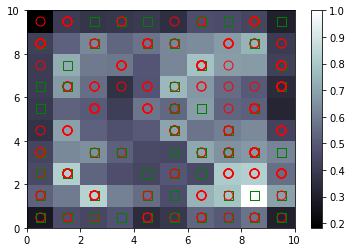

In [ ]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T) #plot SOM distance map
#the color indicates the neuron's distance from neighboring neurons
colorbar() #adding a colorbar legend for readibility
markers = ['o', 's']
colors = ['r', 'g']
#red circles: approved=0
#green squares: approved=1
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]], #ass markers using the "Approved" value
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 9,
         markeredgewidth = 1
         )
show()

## Identifying outliers
The neuron located at position (8,1) stands out from its neighbors. Let's find the customers that are mapped to this neuron.

In [ ]:
# identifying potential fraudulent applications
mappings = som.win_map(X)
fraud=mappings[(8,1)];
#fraud = np.concatenate((mappings[(3,3)], mappings[(5,5)]), axis = 0)#to select multiple units on the map

In [ ]:
#inverse transform to get the actual customer IDs
fraud = sc.inverse_transform(fraud)

In [ ]:
print(len(fraud),"potential fraudulent applications")
print('Customer IDs:',
fraud[:,0])

4 potential fraudulent applications
Customer IDs: [15654859. 15723827. 15725028. 15731989.]


## Create another SOM
Let's try another SOM with 15x10 neurons.

In [ ]:
som = MiniSom(x = 15, y = 10, input_len=X.shape[1], sigma = 1.0, learning_rate = 0.2, random_seed=11)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

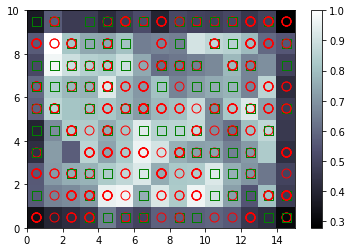

In [ ]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T) #plot SOM distance map
#the color indicates the neuron's distance from neighboring neurons
colorbar() #adding a colorbar legend for readibility
markers = ['o', 's']
colors = ['r', 'g']
#red circles: approved=0
#green squares: approved=1
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]], #ass markers using the "Approved" value
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 9,
         markeredgewidth = 1
         )
show()

### Question 1
Which neurons on your map seem to be outliers?


specify their position in the following cell to retrieve the corresponding customer IDs.


Answer: The neorons at position (1,8) seem to be outliers. position is (1,8).

In [ ]:
mappings = som.win_map(X)
#enter location of outlier neuron based on the above maps
#fraud=mappings[(1,8)]; #use this line if you have only 1 outlier neuron
fraud = np.concatenate((mappings[(1,7)], mappings[(1,8)]), axis = 0) #use this line if you have more than one neuron
fraud = sc.inverse_transform(fraud)
print(len(fraud),"potential fraudulent applications")
print('Customer IDs:',
fraud[:,0])

13 potential fraudulent applications
Customer IDs: [15775750. 15764226. 15775235. 15762045. 15761047. 15799859. 15789014.
 15814116. 15721507. 15802106. 15711249. 15812766. 15700046.]


###Question 2
How many potentially fradulent applications do you identiy using the second SOM?

Answer: 13 potential fraudulent applications can be identified using the second SOM.

### Question 3
Do the identified outlier IDs overlap with those identified using the first SOM?

Answer: No,those identifications utilizing the first SOM DO NOT overlap with the identified outliers.

### Question 4 (optional)
Can you explain why the two sets of results could be different?

Answer: The results could be different,Because the data that we are looking at are from two different clusters.